## <a href="#2.查看数据">查看数据</a>
## <a href="#3.数据处理">数据处理</a>
## <a href="#4.1特征筛选">特征筛选</a>
## <a href="#5.划分训练集">训练集</a>
### <a href="#1.xgboost分类">XGB</a>

# 1.数据读取 

In [8]:
#忽略警告
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
plt.rcParams['axes.unicode_minus']=False

In [9]:
data=pd.read_csv('D:/py/机器学习课程/wisc_bc_data.csv')  
# data=pd.read_excel('改进.xlsx') encoding='gbk',header=None data.columns=['feature'] data=data[1:1000]
# sep=';','/t',delimiter=','
# data=np.array(data) 转换为数组
#data=pd.concat([data,f2],axis=1) #合并数据
#pca降维-数据处理

In [259]:
from scipy.io import arff
data1, meta1 = arff.loadarff('1year.arff')
data2=pd.DataFrame(data1)

#### 1.2合并数据

In [6]:
# 合并表merge()
# tab1=pd.merge(aisles,products,on=['aisle_id','aisle_id'])
# 合并表merge()
sheet4=pd.merge(sheet2,sheet1,how='outer',on=['文物编号','文物编号'])
#左右直接拼接
# pd.merge(y_train,x_train,left_index=True, right_index=True)

aisle_id                       aisle  product_id  \
0             1       prepared soups salads         209   
1             1       prepared soups salads         554   
2             1       prepared soups salads         886   
3             1       prepared soups salads        1600   
4             1       prepared soups salads        2539   
...         ...                         ...         ...   
49683       134  specialty wines champagnes       47713   
49684       134  specialty wines champagnes       48984   
49685       134  specialty wines champagnes       49438   
49686       134  specialty wines champagnes       49562   
49687       134  specialty wines champagnes       49661   

                                            product_name  department_id  
0                                    Italian Pasta Salad             20  
1                                           Turkey Chili             20  
2      Whole Grain Salad with Roasted Pecans & Mango ...             20  
3                               Mediterranean Orzo Salad             20  
4                                  Original Potato Salad             20  
...                                                  ...            ...  
49683                                     Sparkling Rose              5  
49684                                         Dry Sherry              5  
49685                                    Dry Fino Sherry              5  
49686                      Blanc De Noirs Sparkling Wine              5  
49687                                              Porto              5  

[49688 rows x 5 columns]

# 2.查看数据

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#保存为html形式
data.profile_report(title='Data').to_file('Data.html')

In [108]:
# 设置列不限制数量 
pd.set_option('display.max_columns',None)
# 设置行不限制数量
pd.set_option('display.max_rows',None)
data.corr()

Attr1     Attr2     Attr3         Attr4     Attr5     Attr6  \
Attr1   1.000000 -0.109158  0.108891  3.134032e-04  0.005517  0.074979   
Attr2  -0.109158  1.000000 -0.994982 -1.612391e-03 -0.039090 -0.888246   
Attr3   0.108891 -0.994982  1.000000  2.166607e-03  0.039145  0.887437   
Attr4   0.000313 -0.001612  0.002167  1.000000e+00  0.001847  0.000114   
Attr5   0.005517 -0.039090  0.039145  1.847450e-03  1.000000  0.034240   
Attr6   0.074979 -0.888246  0.887437  1.137703e-04  0.034240  1.000000   
Attr7   0.278877 -0.068053  0.036347  3.085857e-05  0.001935  0.077044   
Attr8   0.000076 -0.002458  0.001273  6.117024e-01  0.001632  0.000648   
Attr9  -0.217751 -0.016716 -0.002950 -3.078365e-04  0.000898  0.019626   
Attr10 -0.130181 -0.420811  0.394206  6.507827e-04  0.015740  0.425030   
Attr11  0.243909 -0.015276 -0.015337  1.177719e-06 -0.000666  0.035343   
Attr12  0.094043 -0.002459  0.001055  1.308752e-01  0.000828  0.019653   
Attr13  0.003584  0.001030 -0.001245  1.367419e-03 -0.000520 -0.001322   
Attr14  0.278877 -0.068053  0.036347  3.082783e-05  0.001935  0.077044   
Attr15  0.000219  0.001416 -0.001098 -3.290476e-04 -0.044333 -0.000797   
Attr16  0.090887 -0.001653  0.001288  1.314686e-01  0.000600  0.018644   
Attr17  0.000181 -0.002491  0.001272  6.098407e-01  0.001635  0.000685   
Attr18  0.277431 -0.067706  0.036149  1.504239e-05  0.001931  0.076662   
Attr19  0.006758  0.001576 -0.002126  2.504752e-03 -0.000997 -0.002428   
Attr20 -0.000165  0.000209  0.000026 -4.033751e-05  0.000023  0.000045   
Attr21 -0.000531 -0.000084  0.000090 -1.161068e-05  0.000063 -0.000048   
Attr22  0.269035 -0.033917  0.003193 -1.226898e-04 -0.000036  0.006904   
Attr23  0.006758  0.001624 -0.002171  2.147957e-03 -0.000806 -0.002437   
Attr24  0.166936 -0.124200  0.091229 -4.173316e-05  0.003581  0.266388   
Attr25 -0.327844 -0.517358  0.513651  6.604213e-04  0.020346  0.481129   
Attr26  0.093721 -0.001593  0.001214  1.108641e-01  0.000565  0.019215   
Attr27  0.009473 -0.002296  0.002112  5.649538e-05  0.000309  0.000267   
Attr28  0.004714 -0.003075  0.005897  2.754994e-03  0.000540  0.000827   
Attr29  0.039207 -0.063244  0.050072 -1.896208e-02  0.000925  0.061149   
Attr30  0.000112  0.023794 -0.023578 -2.139250e-04 -0.001200 -0.021521   
Attr31  0.006753  0.001741 -0.002287  2.518846e-03 -0.001005 -0.002575   
Attr32 -0.005214  0.040214 -0.040230 -1.677038e-04 -0.002768 -0.035900   
Attr33  0.002609 -0.002767  0.003508  8.868549e-02  0.000712  0.000566   
Attr34  0.047499 -0.002243  0.002405 -7.161484e-02  0.000220  0.009589   
Attr35 -0.018010 -0.040295  0.008314 -1.458422e-04  0.000132  0.012696   
Attr36 -0.216996 -0.014409 -0.004989 -4.380006e-04  0.000235  0.017822   
Attr37  0.000394 -0.000990  0.000496  1.327968e-04  0.000187  0.000480   
Attr38 -0.130640 -0.420132  0.394249  5.928740e-04  0.015764  0.424547   
Attr39  0.001740 -0.002009  0.001997 -2.308331e-04  0.000089  0.002238   
Attr40  0.001399 -0.003152  0.004003  4.902244e-01  0.002167  0.000526   
Attr41  0.000280 -0.000475  0.000523 -9.185532e-05 -0.000205  0.000499   
Attr42  0.005399 -0.000469  0.000812 -9.504390e-04  0.000702  0.001818   
Attr43 -0.000243  0.000546 -0.000289 -3.443749e-07  0.000802 -0.000314   
Attr44 -0.000269  0.000659 -0.000396  1.330062e-05  0.001065 -0.000436   
Attr45  0.002392 -0.002214  0.002363  8.119299e-04 -0.000081  0.001445   
Attr46  0.000253 -0.001484  0.001995  9.999229e-01  0.001839  0.000073   
Attr47 -0.001773  0.001005 -0.001049 -1.818019e-04  0.000135 -0.000866   
Attr48  0.286607 -0.033301  0.003828  4.860780e-05 -0.000139 -0.011998   
Attr49  0.002125 -0.000422  0.000280 -3.024622e-04  0.000204  0.000603   
Attr50  0.000388 -0.001627  0.002115  9.542959e-01  0.001988  0.000170   
Attr51 -0.108194  0.995864 -0.998764 -1.429494e-03 -0.039332 -0.888367   
Attr52 -0.002947  0.011467 -0.012025 -2.045356e-04 -0.001033 -0.010092   
Attr53  0.001518 -0.004921  0.000003  3.059057e-04  0.000126  0.033827   
Attr54  0.00143

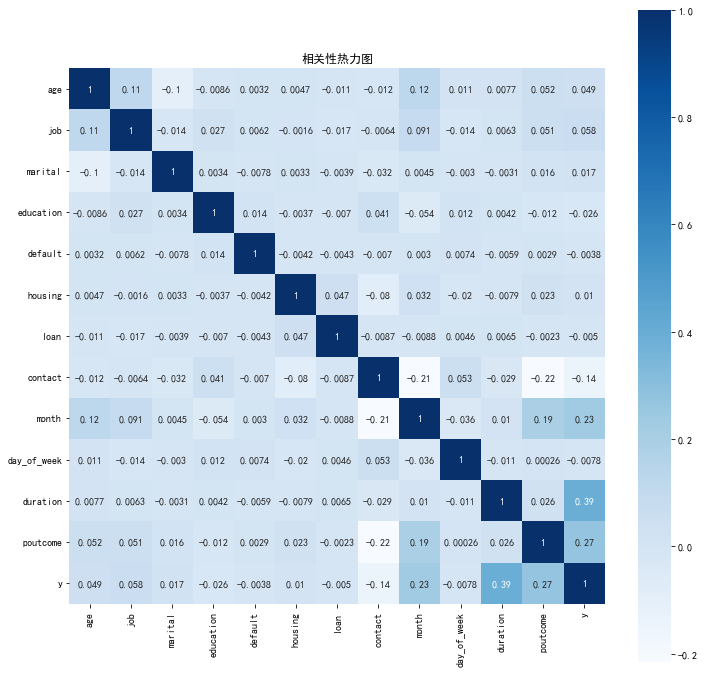

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12),facecolor='w')
sns.heatmap(data_short.corr(),annot=True, vmax=1, square=True, cmap="Blues", fmt='.2g')
plt.title('相关性热力图')
plt.show()

###  <mark> 2.1.1 添加列名 <mark>

In [25]:
#添加列名
data.columns=['carat','cut','color','clarity','depth','table','price','x','y','z']
data.head()

carat        cut color clarity  depth  table  price     x     y     z
1   0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
5   0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48

###  <mark> 2.1.2 查看特征值 <mark>

In [4]:
data.columns

Index(['id', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'description', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating',
       'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

###  <mark> 2.2 查看缺失数据　特征 <mark>

In [42]:
#查看缺失数据　特征
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [43]:
#查看各特征缺失比例
data.isnull().sum()/float(len(data))

id                         0.0
diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: f

###  <mark> 2.3 查看相关性 <mark> 

In [44]:
#利用相关系数选择特征
data.corr()

id  radius_mean  texture_mean  perimeter_mean  \
id                       1.000000     0.074626      0.099770        0.073159   
radius_mean              0.074626     1.000000      0.323782        0.997855   
texture_mean             0.099770     0.323782      1.000000        0.329533   
perimeter_mean           0.073159     0.997855      0.329533        1.000000   
area_mean                0.096893     0.987357      0.321086        0.986507   
smoothness_mean         -0.012968     0.170581     -0.023389        0.207278   
compactness_mean         0.000096     0.506124      0.236702        0.556936   
concavity_mean           0.050080     0.676764      0.302418        0.716136   
concave points_mean      0.044158     0.822529      0.293464        0.850977   
symmetry_mean           -0.022114     0.147741      0.071401        0.183027   
fractal_dimension_mean  -0.052511    -0.311631     -0.076437       -0.261477   
radius_se                0.143048     0.679090      0.275869        0.691765   
texture_se              -0.007526    -0.097317      0.386358       -0.086761   
perimeter_se             0.137331     0.674172      0.281673        0.693135   
area_se                  0.177742     0.735864      0.259845        0.744983   
smoothness_se            0.096781    -0.222600      0.006614       -0.202694   
compactness_se           0.033961     0.206000      0.191975        0.250744   
concavity_se             0.055239     0.194204      0.143293        0.228082   
concave points_se        0.078768     0.376169      0.163851        0.407217   
symmetry_se             -0.017306    -0.104321      0.009127       -0.081629   
fractal_dimension_se     0.025725    -0.042641      0.054458       -0.005523   
radius_worst             0.082405     0.969539      0.352573        0.969476   
texture_worst            0.064720     0.297008      0.912045        0.303038   
perimeter_worst          0.079986     0.965137      0.358040        0.970387   
area_worst               0.107187     0.941082      0.343546        0.941550   
smoothness_worst         0.010338     0.119616      0.077503        0.150549   
compactness_worst       -0.002968     0.413463      0.277830        0.455774   
concavity_worst          0.023203     0.526911      0.301025        0.563879   
concave points_worst     0.035174     0.744214      0.295316        0.771241   
symmetry_worst          -0.044224     0.163953      0.105008        0.189115   
fractal_dimension_worst -0.029866     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
id                        0.096893        -0.012968          0.000096   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.380676          0.642262   
symmetry_s

###  <mark> 2.5 查看 出现频率 <mark>

In [7]:
data["accommodates"].value_counts(1)

2     0.426821
4     0.163485
1     0.128054
3     0.104132
6     0.067916
5     0.049375
8     0.025493
7     0.012688
10    0.009074
16    0.003653
9     0.002907
12    0.002828
11    0.001453
14    0.001375
15    0.000432
13    0.000314
Name: accommodates, dtype: float64

###  <mark> 2.6 查看 有几个等级--最多的--最多出现的次数 <mark>

####  查看连续

In [58]:
#连续
data.describe()
#离散
data.describe(include=["object"])

loan_amnt     annual_inc   open_acc   total_pymnt  total_rec_int
count      66.000000      65.000000  68.000000     68.000000      68.000000
mean    19913.257576   73199.676923   9.264706  14637.408621    2965.349559
std     60650.680480   65755.454700   3.815200  11882.493935    3569.197500
min      1800.000000   16000.000000   2.000000   1014.530000     203.350000
25%      6000.000000   45600.000000   7.000000   6543.590000     988.145000
50%     11000.000000   63000.000000   9.000000  10819.285650    1612.175000
75%     17600.000000   82000.000000  11.250000  19901.630490    3046.635000
max    500000.000000  550000.000000  19.000000  48845.292210   14124.860000

# 3.数据处理

##  <mark> 3.1 去除 <mark>

In [47]:
#去除重复列
print(data.shape)
_, i = np.unique(data.columns, return_index=True) 
data=data.iloc[:, i]
print(data.shape)

(569, 32)

In [262]:
#去除重复行
print(data.shape)
data =data.drop_duplicates()
#subset='user_id'
print(data.shape)
#去除取值唯一的无用特征值
data=data.loc[:,data.apply(pd.Series.nunique)!=1]
print(data.shape)

(43004, 66)


In [42]:
#删除某值所在行
data=data.where(data!=3).dropna(axis=0)
data

b  a
0  1.0  4
1  2.0  5

In [18]:
#删除某一行
data=data.drop(data['b'][data['b']==3].index)
data

b  a
0  1  4
1  2  5

In [4]:
#删除
del data["id"]

In [60]:
#比例少于0.7的删除,酌情考虑
data=data.dropna(axis=1,thresh=len(data)*0.3)
data.shape

(200, 75)

In [ ]:
# 去除某些列特征值--数据太少
data = data.drop(['Ticket','Cabin'],axis=1)

In [17]:
# 去除一列中的冗余字符 
data['面积']=data['面积'].str.replace(r'平米','',regex=True)
data
# 法2
# data['PRODUCTID']=data['PRODUCTID'].str.replace(r'210','',regex=True)
# 法3
# price=data['price'].str.replace(r'[$,]','',regex=True).astype(np.float32)

区域        小区名称     户型   面积(㎡)  价格(元/月)
0     东城     万国城MOMA   1室0厅   59.11    10000
1     东城    北官厅胡同2号院   3室0厅   56.92     6000
2     东城       和平里三区   1室1厅   40.57     6900
3     东城        菊儿胡同   2室1厅   57.09     8000
4     东城  交道口北二条35号院   1室1厅   42.67     5500
...   ..         ...    ...     ...      ...
8218  顺义        怡馨家园   3室1厅  114.03     5500
8219  顺义      旭辉26街区  4房间2卫      59     5000
8220  顺义     前进花园玉兰苑   3室1厅   92.41     5800
8221  顺义        双裕小区   2室1厅   71.81     4200
8222  顺义       樱花园二区   1室1厅   35.43     2700

[5773 rows x 5 columns]

In [53]:
#保存户型大于50的数据
place_count=data['户型'].value_counts()[data['户型'].value_counts()>50]
place_count

2室1厅    2249
1室1厅     844
3室1厅     766
3室2厅     489
2室2厅     265
1室0厅     244
4室2厅     191
1室1卫     126
2室1卫     120
3室1卫      92
4室1厅      58
Name: 户型, dtype: int64

In [40]:
#保存筛选大于3数据的全部
data=data[data['place_id'].isin(place_count[place_count>3].index.values)]

##  <mark> 3.2.1 统一数据格式 <mark>

In [11]:
print(data["loan_status"].value_counts())
#统一数据格式
data["loan_status"]=data["loan_status"].map(str.title)
print(data["loan_status"].value_counts())

Fully Paid     5
fully Paid     2
fully paid     1
Charged Off    1
FULLY PAID     1
Name: loan_status, dtype: int64
Fully Paid     9
Charged Off    1
Name: loan_status, dtype: int64


##  <mark> 3.2 补充数据 <mark>

In [34]:
#添加day列数据
data['day']=date.day

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#用中位数对一列中的缺失值进行补充
# data['Age'].fillna(data['Age'].mean(), inplace=True)
# data.isnull().sum()/float(len(data))
#连续型均值
data=data.fillna(data.mean())
data.isnull().sum()/float(len(data))
#离散型众数
data['one']=data['one'].fillna(data['one'].mode()[0])
data.isnull().sum()/float(len(data))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#划分孕产次
data['孕次']=data['孕产次'].str[0:2]
data['产次']=data['孕产次'].str[2:]
# BUS6['PRODUCTID']=BUS6['PRODUCTID'].str[3:]

In [41]:
#拆分数据
a=[x for x in cc5['包包装尺寸'].str.split("×")]
#9*3
a

[['12 ', ' 7 ', ' 4'],
 ['12 ', ' 7 ', ' 4'],
 ['12 ', ' 7 ', ' 4'],
 ['14 ', ' 7 ', ' 5'],
 ['14 ', ' 7 ', ' 5'],
 ['14 ', ' 7 ', ' 5'],
 ['14 ', ' 7 ', ' 5'],
 ['5 ', ' 8 ', ' 5'],
 ['5 ', ' 8 ', ' 5']]

##  <mark> 3.3 合并数据 <mark>

In [13]:
#将age进行整合
def f(x):
    if x<=16:
        return "0"
    elif x<=32:
        return "1"
    elif x<=48:
        return "2"
    elif x<=64:
        return "3"
    else:
        return "4"
data["age_new"]=data["Age"].map(f)
#去除age
data = data.drop(['Age'],axis=1)
data

Survived  Pclass  Sex  SibSp  Parch     Fare Embarked age_new
0           0       3    0      1      0   7.2500        S       1
1           1       1    1      1      0  71.2833        C       2
2           1       3    1      0      0   7.9250        S       1
3           1       1    1      1      0  53.1000        S       2
4           0       3    0      0      0   8.0500        S       2
..        ...     ...  ...    ...    ...      ...      ...     ...
886         0       2    0      0      0  13.0000        S       1
887         1       1    1      0      0  30.0000        S       1
888         0       3    1      1      2  23.4500        S       1
889         1       1    0      0      0  30.0000        C       1
890         0       3    0      0      0   7.7500        Q       1

[891 rows x 8 columns]

In [ ]:
#保存数据
data.to_excel('data_2020_08.xlsx', index=False)  # index=False的意思就是忽略行索引

###  <mark> 3.4 时间处理--转换为datetime <mark>

In [ ]:
#法1
data['date']=pd.to_datetime(data['date'])

### 返回年月周就比较方便
data['year']=data['date'].dt.year

In [31]:
#法2
time_value=pd.to_datetime(data['time'],unit='s')
time_value

112        1970-01-08 05:06:14
180        1970-01-08 01:29:55
367        1970-01-07 17:01:07
874        1970-01-02 15:52:46
1022       1970-01-03 09:46:33
                   ...        
29115112   1970-01-09 08:31:25
29115204   1970-01-07 12:29:49
29115338   1970-01-09 20:46:26
29115464   1970-01-02 18:11:58
29117493   1970-01-01 22:06:09
Name: time, Length: 83197, dtype: datetime64[ns]

In [32]:
date=pd.DatetimeIndex(time_value)
date.weekday

Int64Index([3, 3, 2, 4, 5, 1, 1, 4, 6, 2,
            ...
            4, 3, 4, 4, 6, 4, 2, 4, 4, 3],
           dtype='int64', name='time', length=83197)

###  <mark> 3.5 转换数据形式 <mark>

In [51]:
from sklearn.preprocessing import LabelEncoder
#用labelencoder将离散属性用数字表示,实现次序型类别变量的数值转换
l=LabelEncoder()
l.fit(data.diagnosis)
print(l.classes_)
data.diagnosis=pd.Series(l.transform(data.diagnosis))
data.diagnosis.value_counts()

['B' 'M']


0    357
1    212
Name: diagnosis, dtype: int64

In [18]:
#将emp_length中的
data["emp_length"]=data["emp_length"].map({"10+years":2,"2years":1,"1year":0})
data

grade  loan_amnt  emp_length  loan_status
0     A    35000.0           2   Fully Paid
1     B    12800.0           2   Fully Paid
2     B    12000.0           2   fully paid
3     C     4000.0           1   FULLY PAID
4     D    14125.0           2   Fully Paid
5     E     8000.0           1   Fully Paid
6     E    12000.0           2   fully Paid
7     F     8000.0           0  Charged Off
8     A     7500.0           0   Fully Paid
9     F    14000.0           2   fully Paid

In [5]:
#转换成字典
data=data.to_dict(orient='records')

In [ ]:
col_dicts = {}
cols = [ 
        '信誉评级', 
        '是否违约']

col_dicts = {'信誉评级':{'A':5,
'B':4,                     
'C':3,
'D':2,
'E':1},
'是否违约':{'是':1,
'否':0}    
}
for col in cols:
    data[col] = data[col].map(col_dicts[col])

pd.set_option('display.max_columns',None)    
data.head(20)
# 查看是否有缺失数据
data.isnull().sum()

In [9]:
#法2
cut_dict = {"Fair":0,"Good":1, "VeryGood":2,"Premium":3, "Ideal":4}
diamond.cut = diamond.cut.map(cut_dict)

color_dict = {"J":0 , "I":1, "H":2, "G":3, "F":4, "E":5, "D":6}
diamond.color = diamond.color.map(color_dict)

clarity_dict = {"I1":0, "SI1":1, "SI2":2, "VS1":3, "VS2":4, "VVS1":5, "VVS2":6, "IF":7}
diamond.clarity = diamond.clarity.map(clarity_dict)

In [10]:
diamond.head(9)

carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    4      5        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    3      5        1   59.8   61.0    326  3.89  3.84  2.31
2   0.23    1      5        3   56.9   65.0    327  4.05  4.07  2.31
3   0.29    3      1        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31    1      0        2   63.3   58.0    335  4.34  4.35  2.75
5   0.24    2      0        6   62.8   57.0    336  3.94  3.96  2.48
6   0.24    2      1        5   62.3   57.0    336  3.95  3.98  2.47
7   0.26    2      2        1   61.9   55.0    337  4.07  4.11  2.53
8   0.22    0      5        4   65.1   61.0    337  3.87  3.78  2.49

##  <mark> 3.5.1.1 异常值去除 <mark>

In [41]:
#孤立森林
from sklearn.ensemble import IsolationForest
from scipy import stats
# 拟合数据
clf = IsolationForest(max_samples=len(data),contamination=0.01)
clf.fit(data)
#predict预测
ypred=clf.fit_predict(data)
f2=pd.DataFrame(ypred,columns=['label'])
#合并
data=pd.concat([data,f2],axis=1)
data=data[data["label"]==1]
print(data.shape)
#去除标签label
data= data.drop(['label'],axis=1)
data

(563, 33)


area_mean  area_se  area_worst  compactness_mean  compactness_se  \
0       1001.0   153.40      2019.0           0.27760         0.04904   
1       1326.0    74.08      1956.0           0.07864         0.01308   
2       1203.0    94.03      1709.0           0.15990         0.04006   
3        386.1    27.23       567.7           0.28390         0.07458   
4       1297.0    94.44      1575.0           0.13280         0.02461   
..         ...      ...         ...               ...             ...   
564     1479.0   158.70      2027.0           0.11590         0.02891   
565     1261.0    99.04      1731.0           0.10340         0.02423   
566      858.1    48.55      1124.0           0.10230         0.03731   
567     1265.0    86.22      1821.0           0.27700         0.06158   
568      181.0    19.15       268.6           0.04362         0.00466   

     compactness_worst  concave points_mean  concave points_se  \
0              0.66560              0.14710            0.01587   
1              0.18660              0.07017            0.01340   
2              0.42450              0.12790            0.02058   
3              0.86630              0.10520            0.01867   
4              0.20500              0.10430            0.01885   
..                 ...                  ...                ...   
564            0.21130              0.13890            0.02454   
565            0.19220              0.09791            0.01678   
566            0.30940              0.05302            0.01557   
567            0.86810              0.15200            0.01664   
568            0.06444              0.00000            0.00000   

     concave points_worst  concavity_mean  ...  radius_worst  smoothness_mean  \
0                  0.2654         0.30010  ...        25.380          0.11840   
1                  0.1860         0.08690  ...        24.990          0.08474   
2                  0.2430         0.19740  ...        23.570          0.10960   
3                  0.2575         0.24140  ...        14.910          0.14250   
4                  0.1625         0.19800  ...        22.540          0.10030   
..                    ...             ...  ...           ...              ...   
564                0.2216         0.24390  ...        25.450          0.11100   
565                0.1628         0.14400  ...        23.690          0.09780   
566                0.1418         0.09251  ...        18.980          0.08455   
567                0.2650         0.35140  ...        25.740          0.11780   
568                0.0000         0.00000  ...         9.456          0.05263   

     smoothness_se  smoothness_worst  symmetry_mean  symmetry_se  \
0         0.006399           0.16220         0.2419      0.03003   
1         0.005225           0.12380         0.1812      0.01389   
2         0.006150           0.14440         0.2069      0.02250   
3         0.009110           0.20980         0.2597      0.05963   
4         0.011490           0.13740         0.1809      0.01756   
..             ...               ...            ...          ...   
564       0.010300           0.14100         0.1726      0.01114   
565       0.005769           0.11660         0.1752      0.01898   
566       0.005903           0.11390         0.1590      0.01318   
567       0.006522           0.16500         0.2397      0.02324   
568       0.007189           0.08996         0.1587      0.02676   

     symmetry_worst  texture_mean  texture_se  texture_worst  
0            0.4601         10.38      0.9053          17.33  
1            0.2750         17.77      0.7339          23.41  
2            0.3613         21.25      0.7869          25.53  
3            0.6638         20.38      1.1560          26.50  
4            0.2364         14.34      0.7813          16.67  
..              ...           ...         ...            ...  
564          0.2060         22.39      1.2560          26.40  
565          0.2572         28.25      2.

In [52]:
#LOF
from sklearn.neighbors import LocalOutlierFactor
# fit the model 训练模型
clf= LocalOutlierFactor(n_neighbors=20)             #n_neighbors临近距离，默认20
clf.fit(data)
#predict预测
ypred=clf.fit_predict(data)
f2=pd.DataFrame(ypred,columns=['label'])
#合并
data=pd.concat([data,f2],axis=1)
data=data[data["label"]==1]
print(data.shape)
#去除标签label
data= data.drop(['label'],axis=1)
data

(527, 33)


area_mean  area_se  area_worst  compactness_mean  compactness_se  \
2       1203.0    94.03      1709.0           0.15990         0.04006   
3        386.1    27.23       567.7           0.28390         0.07458   
4       1297.0    94.44      1575.0           0.13280         0.02461   
7        577.9    50.96       897.0           0.16450         0.03029   
9        475.9    23.94       711.4           0.23960         0.07217   
..         ...      ...         ...               ...             ...   
564     1479.0   158.70      2027.0           0.11590         0.02891   
565     1261.0    99.04      1731.0           0.10340         0.02423   
566      858.1    48.55      1124.0           0.10230         0.03731   
567     1265.0    86.22      1821.0           0.27700         0.06158   
568      181.0    19.15       268.6           0.04362         0.00466   

     compactness_worst  concave points_mean  concave points_se  \
2              0.42450              0.12790            0.02058   
3              0.86630              0.10520            0.01867   
4              0.20500              0.10430            0.01885   
7              0.36820              0.05985            0.01448   
9              1.05800              0.08543            0.01432   
..                 ...                  ...                ...   
564            0.21130              0.13890            0.02454   
565            0.19220              0.09791            0.01678   
566            0.30940              0.05302            0.01557   
567            0.86810              0.15200            0.01664   
568            0.06444              0.00000            0.00000   

     concave points_worst  concavity_mean  ...  radius_worst  smoothness_mean  \
2                  0.2430         0.19740  ...        23.570          0.10960   
3                  0.2575         0.24140  ...        14.910          0.14250   
4                  0.1625         0.19800  ...        22.540          0.10030   
7                  0.1556         0.09366  ...        17.060          0.11890   
9                  0.2210         0.22730  ...        15.090          0.11860   
..                    ...             ...  ...           ...              ...   
564                0.2216         0.24390  ...        25.450          0.11100   
565                0.1628         0.14400  ...        23.690          0.09780   
566                0.1418         0.09251  ...        18.980          0.08455   
567                0.2650         0.35140  ...        25.740          0.11780   
568                0.0000         0.00000  ...         9.456          0.05263   

     smoothness_se  smoothness_worst  symmetry_mean  symmetry_se  \
2         0.006150           0.14440         0.2069      0.02250   
3         0.009110           0.20980         0.2597      0.05963   
4         0.011490           0.13740         0.1809      0.01756   
7         0.008805           0.16540         0.2196      0.01486   
9         0.007149           0.18530         0.2030      0.01789   
..             ...               ...            ...          ...   
564       0.010300           0.14100         0.1726      0.01114   
565       0.005769           0.11660         0.1752      0.01898   
566       0.005903           0.11390         0.1590      0.01318   
567       0.006522           0.16500         0.2397      0.02324   
568       0.007189           0.08996         0.1587      0.02676   

     symmetry_worst  texture_mean  texture_se  texture_worst  
2            0.3613         21.25      0.7869          25.53  
3            0.6638         20.38      1.1560          26.50  
4            0.2364         14.34      0.7813          16.67  
7            0.3196         20.83      1.3770          28.14  
9            0.4366         24.04      1.5990          40.68  
..              ...           ...         ...            ...  
564          0.2060         22.39      1.2560          26.40  
565          0.2572         28.25      2.

###  <mark> 3.5.1 列标签转换为字符串 <mark>

In [ ]:
data.columns=list(map(str,data.columns))

In [261]:
data['class']=list(map(int,data['class']))
data['class']

0       0
1       0
2       0
3       0
4       0
       ..
5905    1
5906    1
5907    1
5908    1
5909    1
Name: class, Length: 43405, dtype: int64

###  <mark> 3.6 独热码处理 <mark>

In [77]:
#独热码防止因人为造成拟合问题
from sklearn.preprocessing import OneHotEncoder
one_hot_cut=pd.get_dummies(data['cut'],prefix='cut',drop_first='True')
data.drop(['cut'],axis=1,inplace=True)
data=pd.concat([data,one_hot_cut],axis=1)
data

carat  color  clarity  depth  table  price     x     y     z  cut_1.0  \
1     0.21    1.0      4.0   59.8   61.0    326  3.89  3.84  2.31        1   
2     0.23    5.0      5.0   56.9   65.0    327  4.05  4.07  2.31        0   
3     0.29    6.0      3.0   62.4   58.0    334  4.20  4.23  2.63        1   
4     0.31    6.0      7.0   63.3   58.0    335  4.34  4.35  2.75        0   
5     0.24    5.0      6.0   62.8   57.0    336  3.94  3.96  2.48        0   
..     ...    ...      ...    ...    ...    ...   ...   ...   ...      ...   
995   0.54    1.0      2.0   61.4   52.0   2897  5.30  5.34  3.26        0   
996   0.72    2.0      4.0   62.5   55.0   2897  5.69  5.74  3.57        1   
997   0.72    0.0      5.0   59.4   61.0   2897  5.82  5.89  3.48        0   
998   0.74    6.0      3.0   61.8   58.0   2897  5.81  5.77  3.58        0   
999   1.12    NaN      NaN   60.6   59.0   2898  6.68  6.61  4.03        0   

     cut_2.0  cut_3.0  cut_4.0  
1          0        0        0  
2          0        1        0  
3          0        0        0  
4          0        0        1  
5          0        0        1  
..       ...      ...      ...  
995        1        0        0  
996        0        0        0  
997        0        1        0  
998        0        1        0  
999        0        0        0  

[999 rows x 13 columns]

###  <mark> 3.7 不平衡数据处理 <mark>

#### 先划分训练测试，再训练集中进行不平衡数据处理

In [7]:
#查看比例后决定是否不平衡数据集处理
data["diagnosis"].value_counts(1)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [22]:
data["quality"].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [ ]:
#类别验证不均衡，使用过采样方法处理。imbalanced-learn包可以用来对不平衡数据进行处理。
from imblearn.over_sampling import RandomOverSampler
x = data.iloc[:,:-1].values     #除去最后一栏的数值
y = data['quality'].values
ros = RandomOverSampler()
x, y = ros.fit_resample(x, y)

In [ ]:
from imblearn.over_sampling import SMOTE
# 定义SMOTE模型，random_state相当于随机数种子的作用
smo = SMOTE(random_state=42,k_neighbors = 2)
x, y = smo.fit_resample(x, y)


#### 法2

In [ ]:
#欠采样
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x, y = rus.fit_resample(x, y)


In [25]:
print(pd.DataFrame(y)[0].value_counts().sort_index())

3    681
4    681
5    681
6    681
7    681
8    681
Name: 0, dtype: int64


# 5.划分训练集

In [ ]:
#重置索引
data=data.reset_index(drop=True)

In [13]:
#随机选取训练集 测试集
from sklearn.model_selection import train_test_split
#特征工程，数据标准化
from sklearn.preprocessing import StandardScaler
y=data['diagnosis']
x = data.drop("diagnosis",axis=1)
#x_data = data[:,0]
#y_data = data[:,1]
# x2=x.columns[[62,68,61,5,0,54,63,72,71,70,67,50,39,8,66,2,65,60,51,9,6,1,15,12,4,49,46,27,26,25]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
#数据预处理
transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
#fit则对test数据有影响
x_test=transfer.transform(x_test)

In [ ]:
#分开训练测试
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x = data.drop(['分娩结局'],axis=1)    #除去最后一栏的数值
y = data['分娩结局']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
#标准化
transfer=StandardScaler()
train=transfer.fit_transform(x_train)
test=transfer.transform(x_test)
#重置索引
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
#带特征名
train= pd.DataFrame(train,columns=x_train.columns)
test= pd.DataFrame(test,columns=x_test.columns)
#合并数据
train.insert(0, 'label', y_train)
test.insert(0, 'label', y_test)
#保存
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [36]:
#特征工程，数据标准化
from sklearn.preprocessing import MinMaxScaler
#数据预处理
data['体积']=data['长']*data['宽']*data['高']
data['距离']=data['速度（公里']*data['无货物飞行时间']
data['体积']=1/data['体积']
transfer=MinMaxScaler()
c1=transfer.fit_transform(data[['体积','最大有效载荷能力','速度（公里','距离']][:7])
c=pd.DataFrame(c1,columns=['体积','最大有效载荷能力','速度（公里','距离'])
data['性价比']=c['体积']+c['最大有效载荷能力']+c['速度（公里']+c['距离']+data['包装能力']*0.5+data['视频功能']*0.5

体积  最大有效载荷能力  速度（公里/小时）        距离
0  0.125448  0.000000   0.000000  0.221239
1  0.571848  0.243243   1.000000  1.000000
2  1.000000  0.405405   0.512821  0.079646
3  0.000000  0.567568   0.615385  0.592920
4  0.913978  0.621622   0.512821  0.000000
5  0.201613  1.000000   1.000000  0.440708
6  0.672587  0.891892   0.615385  0.054867

In [54]:
#验证训练集测试集中违约比例是否接近
print (y_train.value_counts()/len(y_train))
print (y_test.value_counts()/len(y_test))

0    0.663043
1    0.336957
Name: diagnosis, dtype: float64
0    0.572327
1    0.427673
Name: diagnosis, dtype: float64


### 1.xgboost分类

In [60]:
from sklearn import metrics
#法一:xgboost分类
import xgboost as xgb #导入xgboost
from sklearn.metrics import accuracy_score,classification_report
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import roc_auc_score
# 参数设置
params={'booster':'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'max_depth':3, #6,3-10
    'lambda':10, #0,增大则保守
    'subsample':1, #1,减少防止过拟合,0.5-1
    'colsample_bytree':0.75, #1,0.5-1
    'min_child_weight':2, #1,
    'eta': 0.025, #0.01-0.2
    'seed':0,
    'nthread':8,
     'silent':0}
xgb1=xgb.XGBClassifier()


xgb1.fit(x_train, y_train)
#准确率
score=xgb1.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= xgb1.predict(x_test)
#auc
print ('auc score:\n',roc_auc_score(y_test, ypred))

# 对测试集进行预测
ypred= xgb1.predict(x_test)
#计算准确率
print(classification_report(y_test,ypred))

[15:32:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
准确率:
 0.6333333333333333
auc score:
 0.653846153846154
              precision    recall  f1-score   support

           0       0.55      0.81      0.66        26
           1       0.77      0.50      0.61        34

    accuracy                           0.63        60
   macro avg       0.66      0.65      0.63        60
weighted avg       0.68      0.63      0.63        60



准确率： 0.8317486338797814
精准率： 0.8536585365853658
召回率： 0.7954545454545454
F1得分： 0.8235294117647058


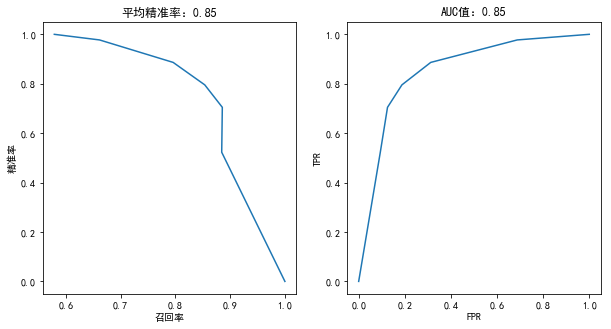

In [ ]:
# 1. K近邻
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn,features_temp,targets,cv=5)
print("准确率：",scores.mean())

knn.fit(X_train,y_train)

y_predict = knn.predict(X_test)
# 精准率
print("精准率：",precision_score(y_test,y_predict))
# 召回率
print("召回率：",recall_score(y_test,y_predict))
# F1-Score
print("F1得分：",f1_score(y_test,y_predict))

plotting(knn,y_test)

In [ ]:
#查看ypred不同输出
np.unique(ypred, return_index=False, return_inverse=False, return_counts=False)

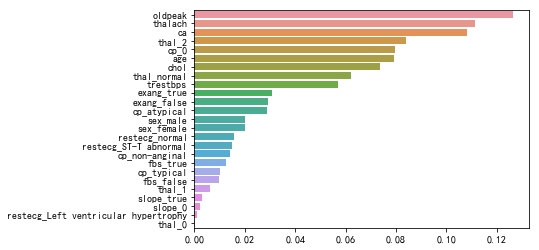

In [ ]:
importances = pd.Series(data=rf.feature_importances_,index=features.columns).sort_values(ascending=False)
sns.barplot(y=importances.index,x=importances.values,orient='h')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

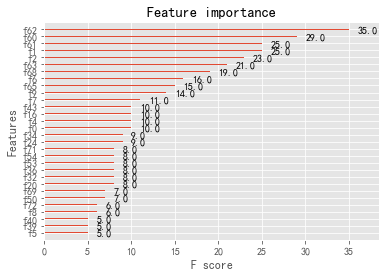

In [135]:
#展示特征的重要性
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(xgb1,max_num_features=30) # 选取最重要的10个特征

In [ ]:
ypred=rf.predict(sheet_pre.drop(["表面风化",'文物采样点','文物编号','depth'],axis=1))
ypred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [ ]:
f2=pd.DataFrame(ypred,columns=['ifor_label'])
#合并
result=pd.concat([data,f2],axis=1)
result

许可证   购进数量   销售数量  修正数量    期末库存   日均销量       存销比  \
0      '33040220080318799A    5.0    1.1   0.0     5.9   0.04    166.27   
1      '33040220080429855A   20.0   19.0   0.0    16.3   0.61     26.59   
2      '33040220080513869A   22.0    0.2   0.0    83.6   0.01   12958.0   
3      '33040220080521887A    7.0    2.0   0.0    10.0   0.06     155.0   
4      '33040220080602899A   22.0   12.5   0.0    33.8    0.4     83.82   
5      '33040220080707947A   17.0    9.4   0.0    39.5    0.3    130.27   
6      '33040220080904013A   16.0    6.0   0.0    66.3   0.19    342.55   
7      '33040220080904016A   17.0   16.2   0.0     5.2   0.52      9.95   
8      '33040220080904018A    7.0    5.1   0.0    69.9   0.16    424.88   
9      '33040220081024071A    7.0    5.1   0.0     2.3   0.16     13.98   
10     '33040220081027080A   20.0   42.1   0.0     3.0   1.36      2.21   
11     '33040220081030086A   16.0   17.7   0.0     4.6   0.57      8.06   
12     '33040220081113095A    7.0    0.4   0.0    13.0   0.01    1007.5   
13     '33040220081113104A   18.0    4.7   0.0    53.4   0.15    352.21   
14     '33040220081205120A   15.0   10.8   0.0    12.1   0.35     34.73   
15     '33040220081208122A    6.0    5.0   0.0     7.0   0.16      43.4   
16     '33040220081215124A    6.0    8.0   0.0     6.5   0.26     25.19   
17     '33040220081224149A   20.0    3.3   0.0    47.7   0.11    448.09   
18     '33040220090104161A   19.0   22.1   0.0    38.1   0.71     53.44   
19     '33040220090106173A   17.0    3.9   0.0    36.4   0.13    289.33   
20     '33040220090115190A    6.0    0.7   0.0     7.8   0.02    345.43   
21     '33040220090122198A    7.0    4.2   0.0    13.9   0.14     102.6   
22     '33040220090318240A    7.0    3.2   0.0     9.5    0.1     92.03   
23     '33040220090319245A    7.0    8.0   0.0    14.4   0.26      55.8   
24     '33040220090325255A    7.0   21.1   0.0     7.4   0.68     10.87   
25     '33040220090325260A   18.0   16.0   0.0     9.1   0.52     17.63   
26     '33040220090410277A   12.0    1.7   0.0    13.9   0.05    253.47   
27     '33040220090424290A   20.0   28.5   0.0     7.6   0.92      8.27   
28     '33040220090429299A    3.0    6.5   0.0     2.0   0.21      9.54   
29     '33040220090508304A   16.0    5.3   0.0    19.0   0.17    111.13   
30     '33040220090509312A    4.0    0.6   0.0    10.6   0.02    547.67   
31     '33040220090515322A    7.0    4.5   0.0     8.7   0.15     59.93   
32     '33040220090522329A   16.0    2.2   0.0    29.9   0.07    421.32   
33     '33040220090522331A   20.0   45.7   0.0    37.7   1.47     25.57   
34     '33040220090612364A   11.0    5.3   0.0    14.0   0.17     81.89   
35     '33040220090626377A    6.0    5.6   0.0    15.1   0.18     83.59   
36     '33040220090706384A    6.0   21.6   0.0     3.7    0.7      5.31   
37     '33040220090821417A   16.0   14.0   0.0    26.6   0.45      58.9   
38     '33040220090909430A   20.0   14.8   0.0    55.6   0.48    116.46   
39     '33040220090909432A    7.0    4.2   0.0    24.4   0.14     180.1   
40     '33040220091027463A   10.0   12.9   0.0     0.8   0.42      1.92   
41     '33040220091027465A   17.0   28.8   0.0    28.0   0.93     30.14   
42     '33040220091204492A    7.0   24.8   0.0    11.4    0.8     14.25   
43     '33040220091210502A   19.0   13.4   0.0    22.8   0.43     52.75   
44     '33040220091223520A    9.0    3.4   0.0     7.3   0.11     66.56   
45     '33040220091229527A   20.0    6.7   0.0    16.0   0.22     74.03   
46     '33040220100118576A   20.0   16.4   0.0     4.5   0.53      8.51   
47     '33040220100123579A   15.0   15.2   0.0    16.0   0.49     32.63   
48     '33040220100201591A    7.0    0.5   0.0    17.9   0.02    1109.8   
49     '33040220100323615A    7.0    5.5   0.0     8.6   0.18     48.47   
50     '33040220100513670A   21.0    3.9   0.0    28.2   0.13    224.15   
51     '33040220100514675A   16.0    0.3   0.0    31.5   0.01    3255.0   
52     '33040220100524687A   16.0   24.1   0.0  

In [56]:
#法二

dtrain=xgb.DMatrix(x_train,label=y_train)
dtest=xgb.DMatrix(x_test)
#酌情修改max_depth,learning_rate调参
params={'max_depth':7,
           'objective':'binary:logistic',
           'eval_metric':'auc',
           'learning_rate':.05
           }
xg=xgb.train(params,dtrain) 
from sklearn.metrics import roc_auc_score
#对测试数据集进行预测
ypred = xg.predict(dtest)
# 设阈值为0.5
for i in range(len(ypred)):
    ypred[i]=1 if ypred[i]>0.5 else 0
accuracy_xgb = accuracy_score(ypred,y_test)
auc_xgb = roc_auc_score(y_test,ypred)
print('accuracy score:%.2f'% accuracy_xgb)
print('auc score:%.2f'% auc_xgb)
print(classification_report(y_test,ypred))

accuracy score:0.93
auc score:0.92


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

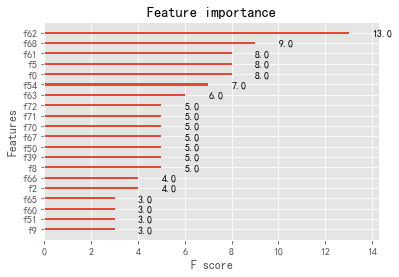

In [203]:
#展示特征的重要性
import matplotlib.pyplot as plt
%matplotlib inline
xgb.plot_importance(xg,max_num_features=20) # 选取最重要的20个特征

### 2.RF分类

#### 2.1大致调参

In [141]:
#随机森林分类
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
rf = RandomForestClassifier()
#加入网格搜索和交叉验证
param_dict={'n_estimators':[50,100,120,300],
           'max_depth':[5,8,15,25,50]} 
#数据过大时调整cv
rf=GridSearchCV(rf,param_grid=param_dict,cv=3) 
rf.fit(x_train, y_train)
#准确率
score_rf=rf.score(x_test,y_test)
print('准确率:\n',score_rf)
#最佳预估器 best_estimator_
print('最佳预估器：\n',rf.best_estimator_,'\n')
# 对测试集进行预测
ypred= rf.predict(x_test)
#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.7666666666666667
最佳预估器：
 RandomForestClassifier(max_depth=40) 

              precision    recall  f1-score   support

           0       0.92      0.66      0.77        35
           1       0.66      0.92      0.77        25

    accuracy                           0.77        60
   macro avg       0.79      0.79      0.77        60
weighted avg       0.81      0.77      0.77        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     23    12
实际存活       2    23
-----------------------------------------


In [291]:
rf = RandomForestClassifier(max_depth=5, n_estimators=50)
rf.fit(x_train, y_train)
#准确率
score_rf=rf.score(x_test,y_test)
print('准确率:\n',score_rf)
# 对测试集进行预测
ypred= rf.predict(x_test)
#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.7166666666666667
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.62      0.80      0.70        25

    accuracy                           0.72        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.74      0.72      0.72        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     23    12
实际存活       5    20
-----------------------------------------


#### 2.2 n_estimators

最优参数以及最高得分: [170.           0.65164835]


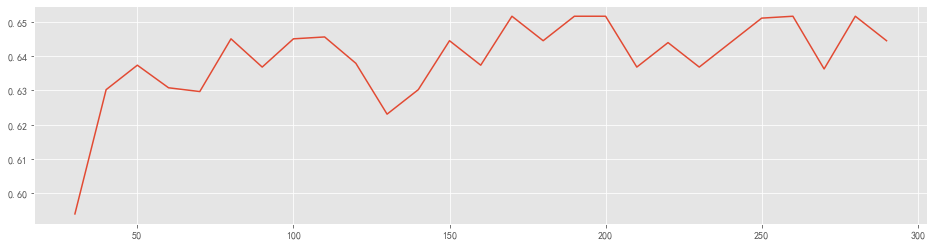

In [81]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
###初调n_estimators参数
ScoreAll = []
for i in range(30,300,10):
    DT = RandomForestClassifier(n_estimators = i,random_state = 66) #,criterion = 'entropy'
    score = cross_val_score(DT,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[16,4])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

最优参数以及最高得分: [170.           0.65164835]


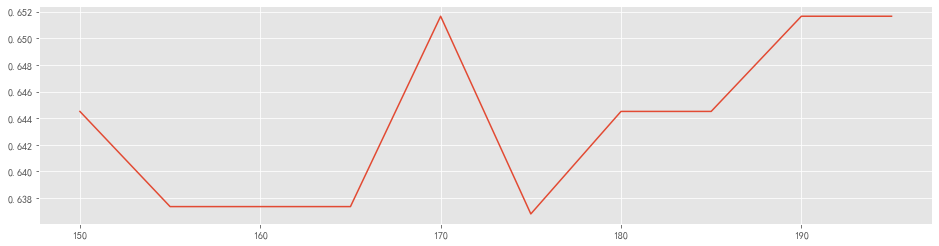

In [82]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score
###调n_estimators参数
ScoreAll = []
for i in range(150,200,5):
    DT = RandomForestClassifier(n_estimators = i,random_state = 66) #,criterion = 'entropy'
    score = cross_val_score(DT,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[16,4])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

#### 2.3 max_depth

最优参数以及最高得分: [5.         0.66648352]


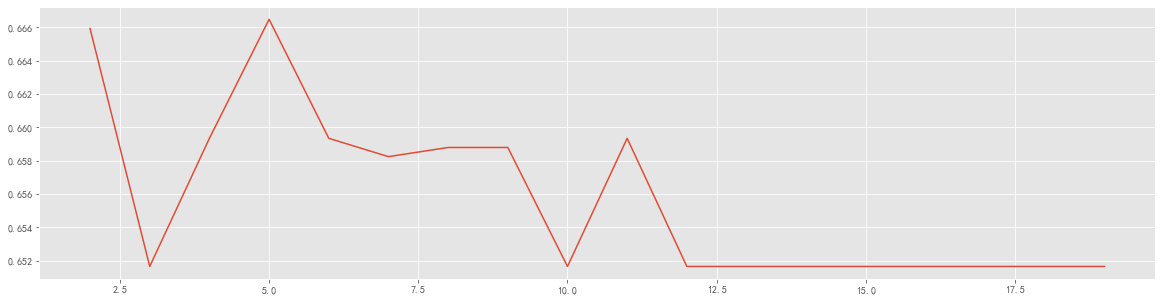

In [83]:
###初调max_depth参数
ScoreAll = []
for i in range(2,20,1):
    DT = RandomForestClassifier(n_estimators = 170,random_state = 66,max_depth =i ) #,criterion = 'entropy'
    score = cross_val_score(DT,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()


#### 2.4 min_samples_split

最优参数以及最高得分: [6.         0.67967033]


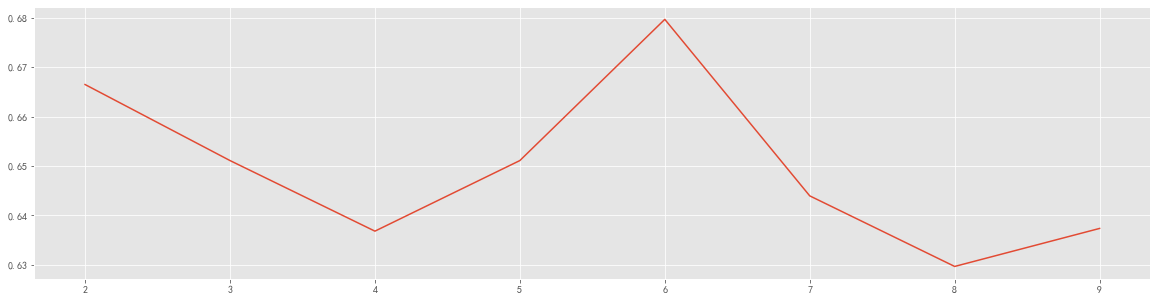

In [85]:
###调min_samples_split参数
ScoreAll = []
for i in range(2,10):
    RF = RandomForestClassifier(n_estimators = 170,random_state = 66,max_depth =5,min_samples_split = i ) #,criterion = 'entropy'
    score = cross_val_score(RF,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

#### 2.5 min_samples_leaf

最优参数以及最高得分: [1.         0.67967033]


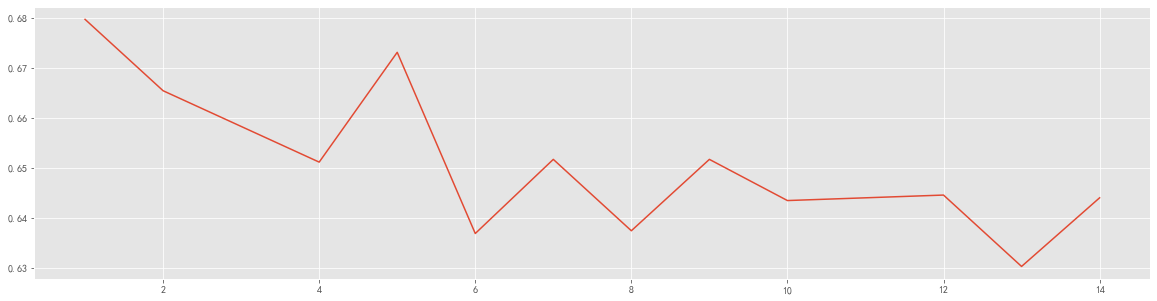

In [87]:
###调min_samples_leaf参数
ScoreAll = []
for i in range(1,10):
    RF = RandomForestClassifier(n_estimators = 170,random_state = 66,max_depth =5,min_samples_leaf =i,min_samples_split = 6 ) #,criterion = 'entropy'
    score = cross_val_score(RF,x_train,y_train,cv=10).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll==np.max(ScoreAll[:,1]))[0][0] ##这句话看似很长的，其实就是找出最高得分对应的索引
print("最优参数以及最高得分:",ScoreAll[max_score])  
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

#### 2.6 max_features

In [90]:
#调max_features参数
param_grid = {
    'max_features':np.arange(0.1,1.1,0.1)}

rfc = RandomForestClassifier(random_state=66,n_estimators = 170,max_depth = 5,min_samples_leaf =1 ,min_samples_split =6 )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

{'max_features': 0.4}
0.6593406593406594


#### 2.7 网格搜索继续调参

In [91]:
import time
start = time.time()

param_grid = {
  'n_estimators':np.arange(150, 200),
  'max_depth':np.arange(3, 7),
  'min_samples_leaf':np.arange(1, 6),
  'min_samples_split':np.arange(4, 8),
   'max_features':np.arange(0.1, 1)
}

rfc = RandomForestClassifier(random_state=66)
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_train,y_train)
end = time.time()
print("循环运行时间:%.2f秒"%(end-start))
print(GS.best_params_)
print(GS.best_score_)

循环运行时间:7600.83秒
{'max_depth': 3, 'max_features': 0.1, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
0.6945054945054945


In [151]:
#随机森林分类
rf = RandomForestClassifier(n_estimators=800,max_depth=15,min_samples_leaf=2,
                            min_samples_split=5,max_features=0.1)
rf.fit(x_train, y_train)
#准确率
score_rf=rf.score(x_test,y_test)
print('准确率:\n',score_rf)
# 对测试集进行预测
ypred= rf.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))

#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.7666666666666667
auc score:
 0.7666666666666667
              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.81      0.71      0.76        31

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     24     5
实际存活       9    22
-----------------------------------------


#### 2.8 酌情降低准确率

In [35]:
#调试
from sklearn.tree import  DecisionTreeClassifier
class_weights = {0:1, 1:10}
cc_model_cost = DecisionTreeClassifier(max_depth=5,class_weight = class_weights)
cc_model_cost.fit(x_train, y_train)
cc_pred_cost = cc_model_cost.predict(x_test)

print (metrics.classification_report(y_test, cc_pred_cost))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, cc_pred_cost),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")
print (metrics.accuracy_score(y_test, cc_pred_cost))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        91
           1       0.97      0.93      0.95        68

    accuracy                           0.96       159
   macro avg       0.96      0.95      0.95       159
weighted avg       0.96      0.96      0.96       159

-----------------------------------------
       预测未存活  预测存活
实际未存活     89     2
实际存活       5    63
-----------------------------------------
0.9559748427672956


#### 2.9 图标重要性

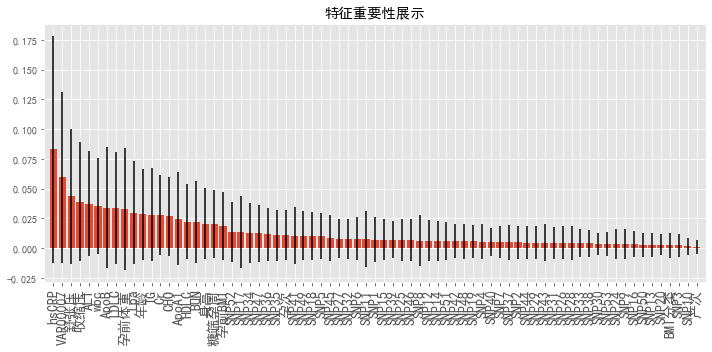

In [162]:
plt.style.use('ggplot')
importances = rf.feature_importances_
#计算随机森林中所有的树的每个特征的重要性的标准差 
std = np.std([rf.feature_importances_ for rf in rf.estimators_], axis=0)
#按照变量的重要性排序后的索引 
indices = np.argsort(importances)[::-1]
#绘图过程 
plt.figure(figsize=(10,5)) 
plt.title("特征重要性展示") 
x=pd.DataFrame(x)
plt.bar(range(x.shape[1]), importances[indices], yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), x.columns[indices], fontsize=14, rotation=90)
plt.xlim([-1, x.shape[1]]) 
plt.tight_layout()

In [165]:
x.columns[indices]

Index(['hsCRP', 'VAR00007', '舒张压', '收缩压', 'ALT', 'wbc', 'ApoB', 'LDLC', '孕前体重',
       'Lpa', '年龄', 'TG', 'Cr', 'CHO', 'ApoA1', 'HDLC', 'BUN', '身高', '糖筛孕周',
       '孕前BMI', 'SNP52', 'SNP17', 'SNP34', 'SNP47', 'SNP36', 'SNP35', '孕次',
       'SNP41', 'SNP49', 'SNP18', 'SNP5', 'SNP45', 'SNP27', 'SNP32', 'SNP6',
       'SNP11', 'SNP1', 'SNP15', 'SNP39', 'SNP25', 'SNP46', 'SNP8', 'SNP12',
       'SNP14', 'SNP51', 'SNP42', 'SNP48', 'SNP19', 'SNP4', 'SNP40', 'SNP7',
       'SNP37', 'SNP2', 'SNP44', 'SNP29', 'SNP43', 'SNP31', 'SNP26', 'SNP28',
       'SNP33', 'SNP38', 'SNP30', 'SNP53', 'SNP24', 'SNP9', 'SNP16', 'SNP50',
       'SNP13', 'SNP20', 'BMI分类', 'SNP3', 'SNP10', '产次'],
      dtype='object')

###  3.SVM

---
1.feature>>index,选择核函数避免过拟合

In [65]:
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report
from sklearn.svm import SVC
sv=SVC()

#加入网格搜索和交叉验证
param_dict={'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
           'kernel':('linear', 'rbf'),
            'gamma': [1, 0.1,0.02, 0.01,0.001]} 
#数据过大时调整cv
sv=GridSearchCV(sv,param_grid=param_dict,cv=10) 
sv.fit(x_train, y_train)
#最佳预估器
print('最佳预估器:\n',sv.best_params_)

#准确率
score=sv.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= sv.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
#计算准确率
print(classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

最佳预估器:
 {'C': 0.9, 'gamma': 0.01, 'kernel': 'rbf'}
准确率:
 0.65
auc score:
 0.65
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.71      0.55      0.62        31

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     22     7
实际存活      14    17
-----------------------------------------


In [67]:
sv=SVC(C=0.9,gamma=0.01,kernel='rbf')
sv.fit(x_train,y_train)
#准确率
score=sv.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= sv.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
#计算准确率
print(classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.65
auc score:
 0.65
              precision    recall  f1-score   support

           0       0.61      0.76      0.68        29
           1       0.71      0.55      0.62        31

    accuracy                           0.65        60
   macro avg       0.66      0.65      0.65        60
weighted avg       0.66      0.65      0.65        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     22     7
实际存活      14    17
-----------------------------------------


#### 提升性能

In [47]:
#改变权重
class_weights = {0:1, 1:6}
breast_model_cost = SVC(class_weight = class_weights)
breast_model_cost.fit(x_train, y_train)
breast_pred_cost = breast_model_cost.predict(x_test)
print(metrics.classification_report(y_test, breast_pred_cost))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, breast_pred_cost),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")
pred = sv.predict(x_test)
print ('准确率:',metrics.accuracy_score(y_test, pred))
print ('auc score:',metrics.accuracy_score(y_test, breast_pred_cost))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       108
           1       0.88      1.00      0.93        63

    accuracy                           0.95       171
   macro avg       0.94      0.96      0.94       171
weighted avg       0.95      0.95      0.95       171

-----------------------------------------
       预测未存活  预测存活
实际未存活     99     9
实际存活       0    63
-----------------------------------------
准确率: 0.9766081871345029
auc score: 0.9473684210526315


In [ ]:
# 获得支持向量
sv.support_vectors_
# 获得支持向量的索引
sv.support_
# 为每一个类别获得支持向量的数量
sv.n_support_

### 4.DT

In [140]:
#调用决策树
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

#加入网格搜索和交叉验证
param_dict={'min_samples_split':[0.2,0.4,0.6,0.8,1]
            ,'max_depth':[1,2,3,5,8,15,25,30]} 
#数据过大时调整cv
dt=GridSearchCV(dt,param_grid=param_dict,cv=10) 
dt.fit(x_train, y_train)
#准确率
score=dt.score(x_test,y_test)
print('准确率:\n',score)
#最佳预估器
print('最佳预估器:\n',dt.best_params_)
# 对测试集进行预测
ypred= dt.predict(x_test)
#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")


准确率:
 0.7
最佳预估器:
 {'max_depth': 3, 'min_samples_split': 0.4}
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.61      0.76      0.68        25

    accuracy                           0.70        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.72      0.70      0.70        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     23    12
实际存活       6    19
-----------------------------------------


In [296]:
dt=DecisionTreeClassifier(max_depth=3,min_samples_split=0.4)
dt.fit(x_train, y_train)
#准确率
score=dt.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= dt.predict(x_test)
#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.7
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        35
           1       0.61      0.76      0.68        25

    accuracy                           0.70        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.72      0.70      0.70        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     23    12
实际存活       6    19
-----------------------------------------


### 5.KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
#加入网格搜索和交叉验证
param_dict={'n_neighbors':[1,3,5,7,9,11]} 
knn=GridSearchCV(knn,param_grid=param_dict,cv=10) #cv=10,数据量大时考虑时间问题减少
knn.fit(x_train,y_train)
#最佳预估器
print('最佳预估器:\n',knn.best_params_)
#准确率
score=knn.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= knn.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
#计算准确率
print(classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

最佳预估器:
 {'n_neighbors': 5}
准确率:
 0.5166666666666667
auc score:
 0.5166666666666667
              precision    recall  f1-score   support

           0       0.50      0.66      0.57        29
           1       0.55      0.39      0.45        31

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.51        60
weighted avg       0.52      0.52      0.51        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     19    10
实际存活      19    12
-----------------------------------------


In [73]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
#准确率
score=knn.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= knn.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
#计算准确率
print(classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.5166666666666667
auc score:
 0.5166666666666667
              precision    recall  f1-score   support

           0       0.50      0.66      0.57        29
           1       0.55      0.39      0.45        31

    accuracy                           0.52        60
   macro avg       0.52      0.52      0.51        60
weighted avg       0.52      0.52      0.51        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     19    10
实际存活      19    12
-----------------------------------------


### 6.GBDT

In [105]:
from sklearn import ensemble,model_selection
gbdt = ensemble.GradientBoostingClassifier(n_estimators=100, 
                                           subsample=0.5,max_depth=3)
gbdt.fit(x_train,y_train)
ypred8=gbdt.predict(x)
#计算准确率
print(classification_report(y,ypred8))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y, ypred8),columns=['预测未破产', '预测破产'],
          index=['实际未破产', '实际破产']))
print("-----------------------------------------")

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5442
           1       0.49      0.73      0.58       408

    accuracy                           0.93      5850
   macro avg       0.73      0.84      0.77      5850
weighted avg       0.94      0.93      0.93      5850

-----------------------------------------
       预测未破产  预测破产
实际未破产   5126   316
实际破产     110   298
-----------------------------------------


### 8.MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp =MLPClassifier()
mlp.fit(x_train, y_train)
# y_pred = mlp.predict(x_test)
#准确率
score=mlp.score(x_test,y_test)
print('准确率:\n',score)
ypred=mlp.predict(x_test)
print(classification_report(y_test, ypred))

准确率:
 0.8125
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        28
           1       0.00      0.00      0.00         4

    accuracy                           0.81        32
   macro avg       0.43      0.46      0.45        32
weighted avg       0.76      0.81      0.78        32



### 6.bagging

In [ ]:
# #导入必要的包
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import RandomForestClassifier 
# from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
# from sklearn.metrics import accuracy_score
# bagging = BaggingClassifier(xgb1)

# # #加入网格搜索和交叉验证
# # param_dict={'n_estimators':[5,10,15,50,100,200]} 
# # #数据过大时调整cv
# # bagging=GridSearchCV(bagging,param_grid=param_dict,cv=5) 
# bagging.fit(x_train, y_train)

# #准确率
# score=bagging.score(x_test,y_test)
# print('准确率:\n',score)
# #最佳预估器 best_estimator_
# print('最佳预估器：\n',bagging.best_estimator_,'\n')
# # 对测试集进行预测
# ypred= bagging.predict(x_test)
# #auc
# print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
# ypred=bagging.predict(x_test)
# print(classification_report(y_test, ypred))

In [72]:

lr=LR()
xgb2=xgb.XGBClassifier(base_score=0.5, booster='gbtree',
                                               colsample_bylevel=1,
                                               colsample_bynode=1,
                                               colsample_bytree=1,
                                               enable_categorical=False,
                                               gamma=0, gpu_id=-1,
                                               importance_type=None,
                                               interaction_constraints='',
                                               learning_rate=0.300000012,
                                               max_delta_step=0, max_depth=6,
                                               min_child_weight=1,
                                               monotone_constraints='()',
                                               n_estimators=100, n_jobs=8,
                                               num_parallel_tree=1,
                                               predictor='auto', random_state=0,
                                               reg_alpha=0, reg_lambda=1,
                                               scale_pos_weight=1, subsample=1,
                                               tree_method='exact',
                                               validate_parameters=1,
                                               verbosity=None)
dt2=DecisionTreeClassifier(max_depth=3,min_samples_split=0.4)
rf2=RandomForestClassifier(max_depth=5,n_estimators=50)

sc=StackingClassifier(classifiers=[xgb2, dt2, rf2], 
                          meta_classifier=lr)
sc.fit(x_train,y_train)    
#准确率
score=sc.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= sc.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
print(classification_report(y_test, ypred))

[17:31:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
准确率:
 0.7166666666666667
auc score:
 0.7166666666666667
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        28
           1       0.78      0.66      0.71        32

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



### 6.SC堆叠分类

In [73]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
lr=LR()
#初始分类器xgb1,knn,rf,次级分类器lr
sclf = StackingClassifier(classifiers=[xgb1, dt, rf], 
                          meta_classifier=lr)
for clf, label in zip([xgb1, dt, rf, sclf], 
                      ['XGB', 
                       'DT', 
                       'RF',
                       'SC']):
 
    scores = model_selection.cross_val_score(clf, x_train, y_train,cv=3, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), label))
sclf.fit(x_train,y_train)    
#准确率
score=sclf.score(x_test,y_test)
print('准确率:\n',score)
ypred=sclf.predict(x_test)
print(classification_report(y_test, ypred))

[17:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.652 [XGB]
Accuracy: 0.638 [DT]
Accuracy: 0.609 [RF]
[17:31

In [57]:
from sklearn import model_selection
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
lr=LR()
#初始分类器xgb1,knn,rf,次级分类器lr
sclf = StackingClassifier(classifiers=[xgb1, dt, rf], 
                          meta_classifier=lr)
sclf.fit(x_train,y_train)    
#准确率
score=sclf.score(x_test,y_test)
print('准确率:\n',score)
# 对测试集进行预测
ypred= sclf.predict(x_test)
#auc
print ('auc score:\n',metrics.accuracy_score(y_test, ypred))
print(classification_report(y_test, ypred))

[15:51:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
准确率:
 0.7166666666666667
auc score:
 0.7166666666666667
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        28
           1       0.78      0.66      0.71        32

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.73      0.72      0.72        60



### 第二轮 

In [229]:
#输出前50个重要特征
x1=x.columns[indices][0:50]
x1

Index(['hsCRP', 'VAR00007', '舒张压', '收缩压', 'ALT', 'wbc', 'ApoB', 'LDLC', '孕前体重',
       'Lpa', '年龄', 'TG', 'Cr', 'CHO', 'ApoA1', 'HDLC', 'BUN', '身高', '糖筛孕周',
       '孕前BMI', 'SNP52', 'SNP17', 'SNP34', 'SNP47', 'SNP36', 'SNP35', '孕次',
       'SNP41', 'SNP49', 'SNP18', 'SNP5', 'SNP45', 'SNP27', 'SNP32', 'SNP6',
       'SNP11', 'SNP1', 'SNP15', 'SNP39', 'SNP25', 'SNP46', 'SNP8', 'SNP12',
       'SNP14', 'SNP51', 'SNP42', 'SNP48', 'SNP19', 'SNP4', 'SNP40'],
      dtype='object')

In [230]:
x2=x.columns[[62,68,61,5,0,54,63,72,71,70,67,50,39,8,66,2,65,60,51,9,6,1,15,12,4,49,46,27,26,25]]
x2

Index(['hsCRP', '年龄', 'VAR00007', 'CHO', 'ALT', 'SNP52', 'wbc', '身高', '舒张压',
       '糖筛孕周', '孕次', 'SNP49', 'SNP39', 'LDLC', '孕前体重', 'ApoB', '孕前BMI', 'TG',
       'SNP5', 'Lpa', 'Cr', 'ApoA1', 'SNP14', 'SNP11', 'BUN', 'SNP48', 'SNP45',
       'SNP28', 'SNP27', 'SNP26'],
      dtype='object')

In [244]:
#随机选取训练集 测试集
from sklearn.model_selection import train_test_split
#特征工程，数据标准化
from sklearn.preprocessing import StandardScaler
y=cc['feature']
x = cc[['hsCRP', 'VAR00007', '舒张压', '收缩压', 'ALT', 'wbc', 'ApoB', 'LDLC', '孕前体重','Lpa', '年龄', 'TG', 'Cr', 'CHO', 'ApoA1', 'HDLC', 'BUN', '身高', '糖筛孕周','孕前BMI', 'SNP52', 'SNP17', 'SNP34', 'SNP47', 'SNP36', 'SNP35', '孕次']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
#数据预处理
transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
#无需拟合
x_test=transfer.transform(x_test)

In [251]:
#法一:xgboost分类
import xgboost as xgb #导入xgboost
from sklearn.metrics import accuracy_score,classification_report
from xgboost import plot_importance
from xgboost.sklearn import XGBClassifier
xgb1=xgb.XGBClassifier()
xgb1.fit(x_train, y_train)
#准确率
score_xgb1=xgb1.score(x_test,y_test)
print('准确率:\n',score_xgb1)
# 对测试集进行预测
ypred= xgb1.predict(x_test)
#计算准确率
print(classification_report(y_test,ypred))

[15:29:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
准确率:
 0.7166666666666667
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.62      0.80      0.70        25

    accuracy                           0.72        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.74      0.72      0.72        60



In [253]:
#随机森林分类
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
rf = RandomForestClassifier()
#加入网格搜索和交叉验证
param_dict={'n_estimators':[50,100,120,300,500,800,1200],
           'max_depth':[5,8,15,25,30,40,50]} 
#数据过大时调整cv
rf=GridSearchCV(rf,param_grid=param_dict,cv=10) 
rf.fit(x_train, y_train)
#准确率
score_rf=rf.score(x_test,y_test)
print('准确率:\n',score_rf)
#最佳预估器 best_estimator_
print('最佳预估器：\n',rf.best_estimator_,'\n')
# 对测试集进行预测
ypred= rf.predict(x_test)
#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.6833333333333333
最佳预估器：
 RandomForestClassifier(max_depth=5, n_estimators=50) 

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        35
           1       0.60      0.72      0.65        25

    accuracy                           0.68        60
   macro avg       0.68      0.69      0.68        60
weighted avg       0.70      0.68      0.69        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     23    12
实际存活       7    18
-----------------------------------------


In [291]:
rf = RandomForestClassifier(max_depth=5, n_estimators=50)
rf.fit(x_train, y_train)
#准确率
score_rf=rf.score(x_test,y_test)
print('准确率:\n',score_rf)
# 对测试集进行预测
ypred= rf.predict(x_test)
#计算准确率
print(metrics.classification_report(y_test,ypred))
print("-----------------------------------------")
print (pd.DataFrame(metrics.confusion_matrix(y_test, ypred),columns=['预测未存活', '预测存活'],
          index=['实际未存活', '实际存活']))
print("-----------------------------------------")

准确率:
 0.7166666666666667
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        35
           1       0.62      0.80      0.70        25

    accuracy                           0.72        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.74      0.72      0.72        60

-----------------------------------------
       预测未存活  预测存活
实际未存活     23    12
实际存活       5    20
-----------------------------------------
